# NLP EDA

Text Data Exploration Techniques

- [Term Frequency](#Term-Frequency)
- [Ngrams](#Ngrams)
- [Document Length](#Document-Length)
- [Word Cloud](#Word-Cloud)
- [Sentiment Analysis](#Sentiment-Analysis)

## Setup

In [1]:
from typing import List
import unicodedata
import re

import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib default plotting styles
plt.rc("patch", edgecolor="black", force_edgecolor=True)
plt.rc("axes", grid=True)
plt.rc("grid", linestyle=":", linewidth=0.8, alpha=0.7)
plt.rc("axes.spines", right=False, top=False)
plt.rc("figure", figsize=(11, 8))
plt.rc("font", size=12.0)
plt.rc("hist", bins=25)

def clean(text: str) -> List[str]:
    "a simple function to prepare text data"
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words("english") + ["r", "u", "2", "ltgt"]
    text = (
        unicodedata.normalize("NFKD", text)
        .encode("ascii", "ignore")
        .decode("utf-8", "ignore")
        .lower()
    )
    words = re.sub(r"[^\w\s]", "", text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

df = pd.read_csv("spam_clean.csv")

A quick data summary

In [2]:
df.shape

(5572, 2)

In [3]:
df.isna().sum()

label    0
text     0
dtype: int64

What percentage of the data is spam?

,n,percent
ham,4825,0.865937
spam,747,0.134063


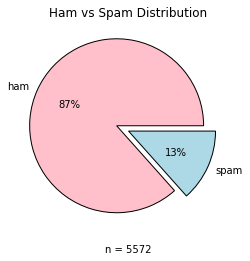

In [4]:
df.label.value_counts().plot.pie(
    colors=["pink", "lightblue"], explode=(0.15, 0), autopct="%.0f%%"
)
plt.title("Ham vs Spam Distribution")
plt.ylabel("")
plt.xlabel("n = %d" % df.shape[0])

pd.concat(
    [df.label.value_counts(), df.label.value_counts(normalize=True)], axis=1
).set_axis(["n", "percent"], axis=1, inplace=False)

## Term Frequency

In [7]:
pd.Series(" ".join(df.text).split()).value_counts()

to               2134
you              1622
I                1466
a                1327
the              1197
and               857
in                798
is                781
i                 742
u                 692
for               644
my                628
of                591
your              560
me                557
on                487
have              474
2                 453
that              421
are               396
it                396
call              376
or                373
be                362
at                359
with              349
not               340
will              330
get               326
can               304
                 ... 
smoked              1
LOU!                1
resolved,           1
sculpture           1
gautham..           1
Qatar.Rakhesh       1
67441233            1
69888!              1
Join.               1
figuring            1
528                 1
CC                  1
clash...            1
mist,               1
7am       

1. one big string for everything, spam, ham
1. lists of strings
1. list of strings -> pandas series so we can value count
1. combine series into single dataframe

In [8]:
all_text = " ".join(df.text)
spam_text = " ".join(df[df.label == "spam"].text)
ham_text = " ".join(df[df.label == "ham"].text)

In [9]:
all_words = clean(all_text)
spam_words = clean(spam_text)
ham_words = clean(ham_text)

In [10]:
all_freq = pd.Series(all_words).value_counts()
spam_freq = pd.Series(spam_words).value_counts()
ham_freq = pd.Series(ham_words).value_counts()

In [11]:
tf = (
    pd.concat([all_freq, ham_freq, spam_freq], axis=1, sort=True)
    .rename(columns={0: "all", 1: "ham", 2: "spam"})
    .fillna(0)
    .apply(lambda col: col.astype(int))
)

- most common words overall?
- most common spam, ham words?
- any words that uniquely spam or ham?

In [12]:
tf.sort_values(by="all").tail(10)

,all,ham,spam
know,267,241,26
free,275,59,216
ok,277,272,5
dont,279,257,22
4,287,168,119
go,304,273,31
ur,384,240,144
get,397,314,83
im,462,449,13
call,600,241,359


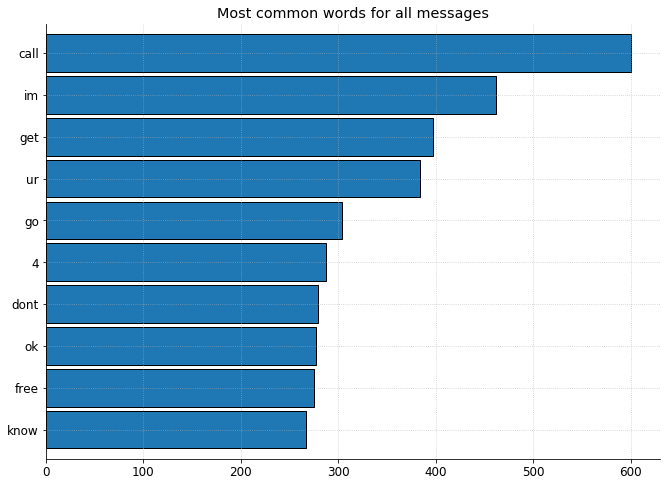

In [27]:
tf.sort_values(by='all')['all'].tail(10).plot.barh(width=.9)
plt.title('Most common words for all messages')
plt.show()

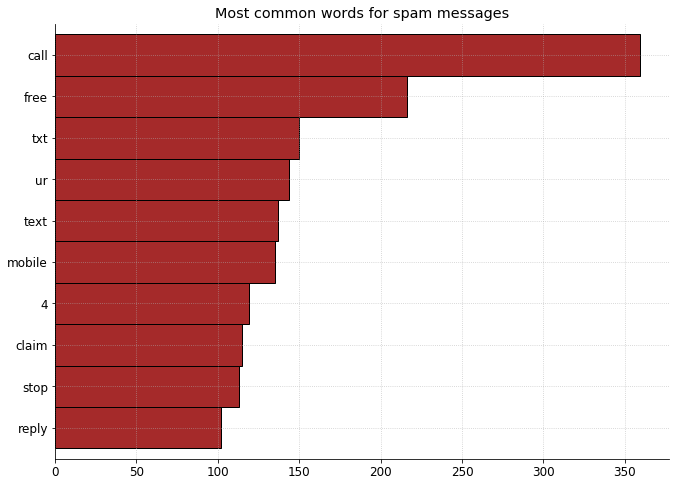

In [28]:
tf.sort_values(by='spam').spam.tail(10).plot.barh(width=1, color='brown')
plt.title('Most common words for spam messages')
plt.show()

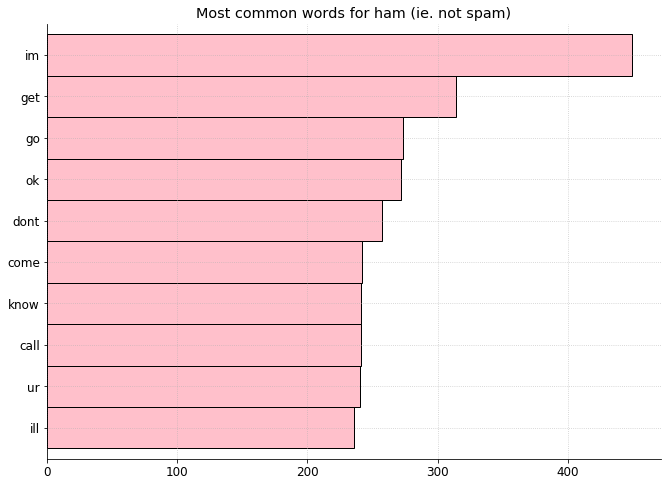

In [29]:
tf.sort_values(by='ham').ham.tail(10).plot.barh(width=1, color='pink')
plt.title('Most common words for ham (ie. not spam)')
plt.show()

## Ngrams

- bigrams + viz most frequent for all, spam, ham
- trigrams, etc

In [30]:
# .split() goes from a string to a list of words

list(nltk.bigrams('I love the smell of regex in the morning'.split()))

[('I', 'love'),
 ('love', 'the'),
 ('the', 'smell'),
 ('smell', 'of'),
 ('of', 'regex'),
 ('regex', 'in'),
 ('in', 'the'),
 ('the', 'morning')]

In [32]:
list(nltk.ngrams('I love the smell of regex in the morning'.split(), 3))

[('I', 'love', 'the'),
 ('love', 'the', 'smell'),
 ('the', 'smell', 'of'),
 ('smell', 'of', 'regex'),
 ('of', 'regex', 'in'),
 ('regex', 'in', 'the'),
 ('in', 'the', 'morning')]

In [15]:
# nltk.bigrams(all_words) has to be converted to a list or a series
# see bellow

pd.Series(nltk.bigrams(all_words))

0                    (go, jurong)
1                 (jurong, point)
2                  (point, crazy)
3              (crazy, available)
4              (available, bugis)
5                      (bugis, n)
6                      (n, great)
7                  (great, world)
8                     (world, la)
9                         (la, e)
10                    (e, buffet)
11                 (buffet, cine)
12                    (cine, got)
13                   (got, amore)
14                   (amore, wat)
15                      (wat, ok)
16                      (ok, lar)
17                  (lar, joking)
18                  (joking, wif)
19                     (wif, oni)
20                    (oni, free)
21                  (free, entry)
22                  (entry, wkly)
23                   (wkly, comp)
24                    (comp, win)
25                      (win, fa)
26                      (fa, cup)
27                   (cup, final)
28                  (final, tkts)
29            

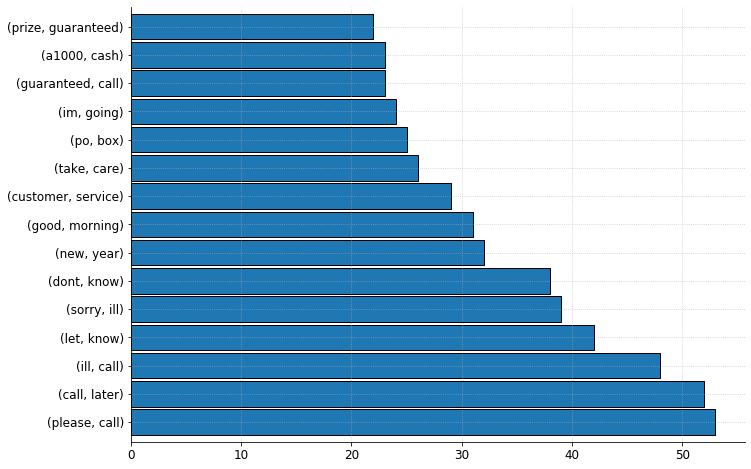

In [34]:
pd.Series(nltk.bigrams(all_words)).value_counts().head(15).plot.barh(width=.9)

## Document Length

In [35]:
df["message_length"] = df.text.apply(len)
df.head()

,label,text,message_length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


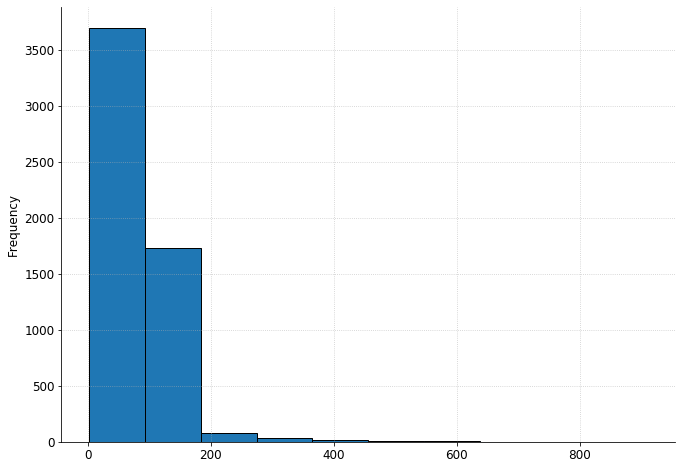

In [37]:
df.message_length.plot.hist()
plt.show()

- There is a higher max and more variation in ham messages, but spam messages have a higher overall average.

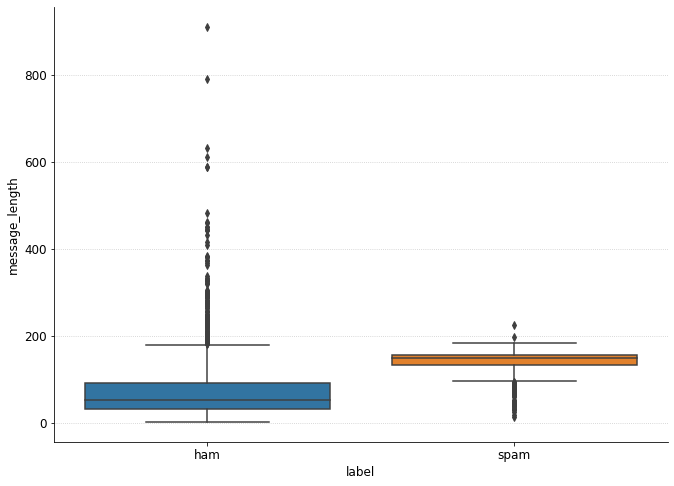

In [38]:
sns.boxplot(data=df, y="message_length", x="label")
plt.show()

# This is so cool!!!!

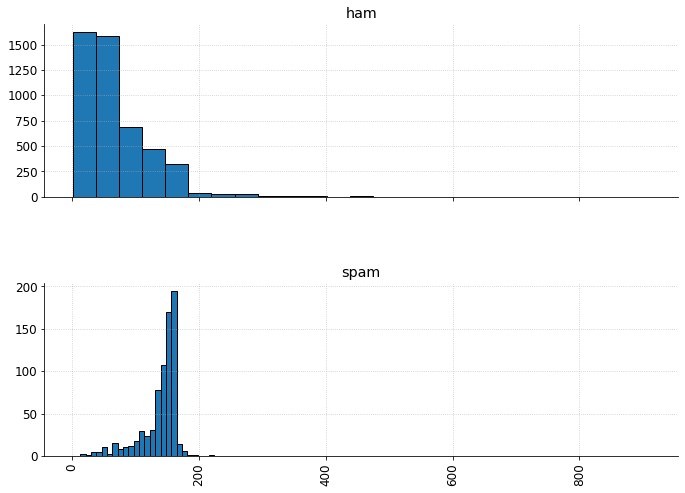

In [41]:
df.hist("message_length", by="label", sharex=True, layout=(2, 1), bins=25)
plt.show()

### Number of Words

In [43]:
df["n_words"] = df.text.str.count(r"\w+")
df.head()

,label,text,message_length,n_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,20
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,33
3,ham,U dun say so early hor... U c already then say...,49,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,14


In [44]:
df.groupby("label").n_words.describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
ham,4825.0,14.677098,11.738398,0.0,7.0,11.0,19.0,190.0
spam,747.0,25.821954,6.073204,2.0,24.0,27.0,30.0,40.0


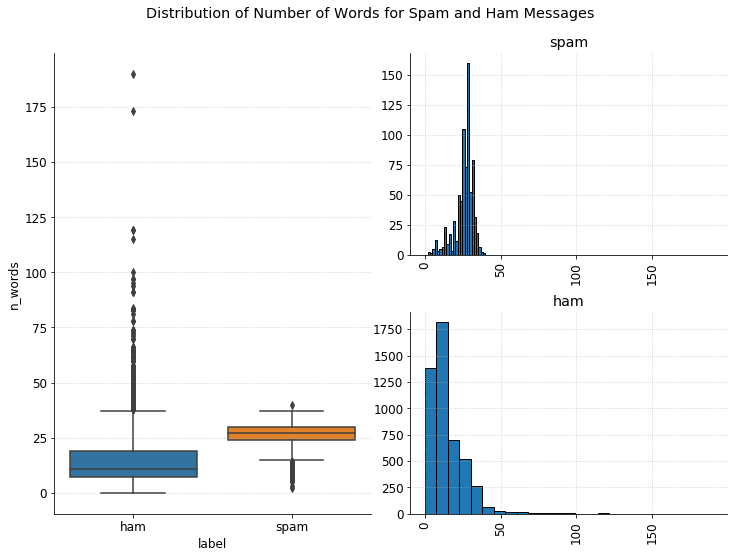

In [46]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.1, 0.4, 0.8])  # left, bottom, width, height
ax2 = fig.add_axes([0.55, 0.1, 0.4, 0.35])
ax3 = fig.add_axes([0.55, 0.55, 0.4, 0.35], sharex=ax2)
sns.boxplot(data=df, y="n_words", x="label", ax=ax1)
df.hist("n_words", by="label", bins=25, ax=[ax2, ax3])
fig.suptitle("Distribution of Number of Words for Spam and Ham Messages")
plt.show()

## Word Cloud

`WordCloud()` produces an image object, which can be displayed with `plt.imshow`

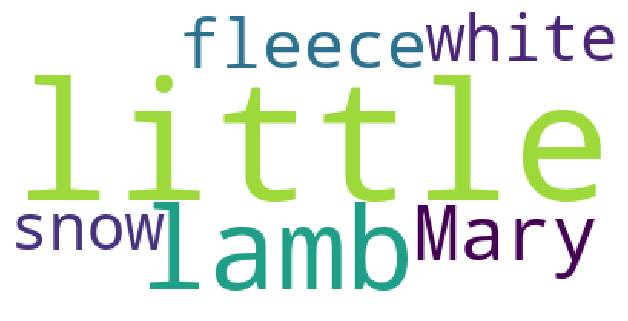

In [49]:
from wordcloud import WordCloud

sentence = (
    "Mary had a little lamb, little lamb, little lamb. Its fleece was white as snow."
)
img = WordCloud(background_color="white", random_state=123).generate(sentence)
plt.imshow(img)
plt.axis("off")
plt.show()

do the same with all words, spam and ham

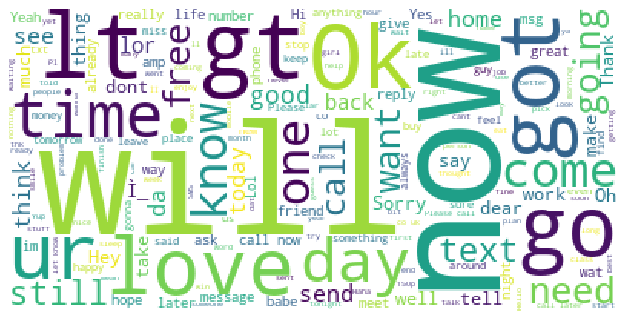

In [52]:
img = WordCloud(background_color="white", random_state=123).generate(all_text)
plt.imshow(img)
plt.axis("off")
plt.show()

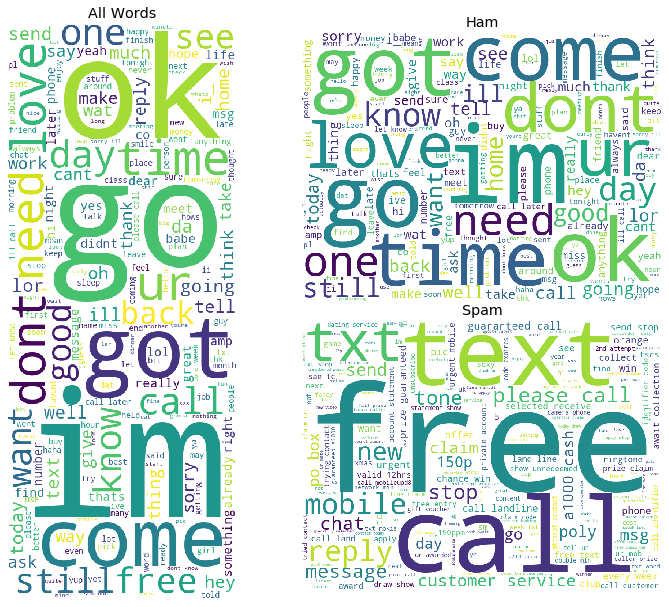

In [53]:
all_cloud = WordCloud(background_color="white", height=1000, width=400).generate(
    " ".join(all_words)
)
ham_cloud = WordCloud(background_color="white", height=600, width=800).generate(
    " ".join(ham_words)
)
spam_cloud = WordCloud(background_color="white", height=600, width=800).generate(
    " ".join(spam_words)
)

plt.figure(figsize=(10, 8))
axs = [
    plt.axes([0, 0, 0.5, 1]),
    plt.axes([0.5, 0.5, 0.5, 0.5]),
    plt.axes([0.5, 0, 0.5, 0.5]),
]

axs[0].imshow(all_cloud)
axs[1].imshow(ham_cloud)
axs[2].imshow(spam_cloud)

axs[0].set_title("All Words")
axs[1].set_title("Ham")
axs[2].set_title("Spam")

for ax in axs:
    ax.axis("off")

### Word Cloud with Bigrams

- `generate_from_frequencies` + python gymnastics

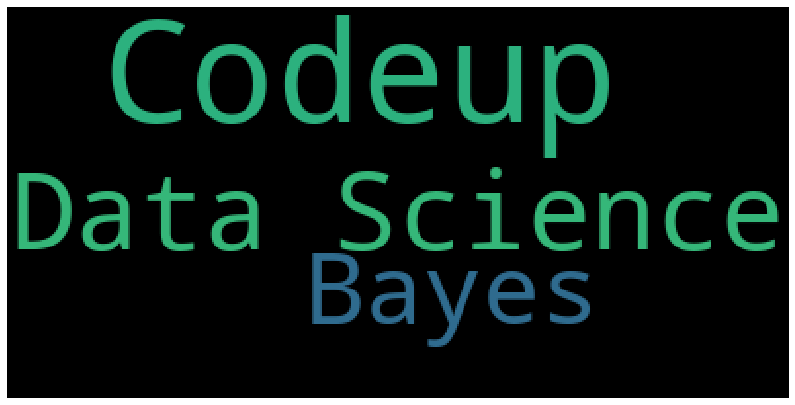

In [57]:
frequencies = {
    "Codeup": 10,
    "Bayes": 5,
    "Data Science": 6,
}

img = WordCloud(background_color="black").generate_from_frequencies(frequencies)
plt.figure(figsize=(14, 8))
plt.imshow(img)
plt.axis("off")
plt.show()

(-0.5, 799.5, 399.5, -0.5)

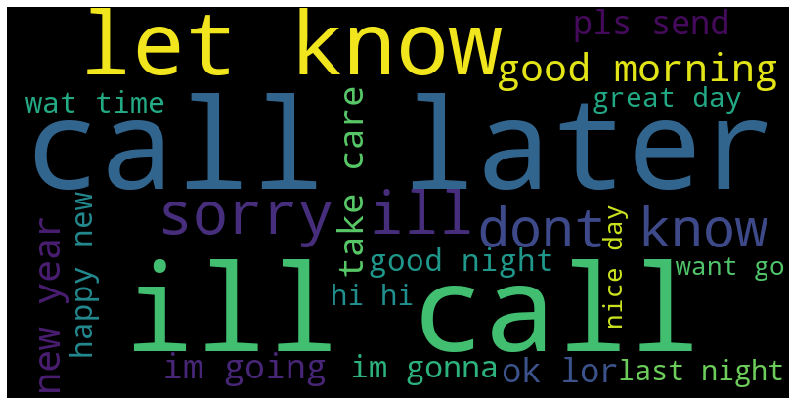

In [59]:
top_20_ham_bigrams = pd.Series(nltk.bigrams(ham_words)).value_counts().head(20)

data = {p1 + " " + p2: v for (p1, p2), v in top_20_ham_bigrams.to_dict().items()}

img = WordCloud(
    background_color="black", width=800, height=400
).generate_from_frequencies(data)

plt.figure(figsize=(14, 8))
plt.imshow(img)
plt.axis("off")

## Sentiment Analysis

A way for us to put a number to indicate whether a document has a positive or
negative sentiment.

### Vader

In [62]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/faith/nltk_data...


In [63]:
sia.polarity_scores("Sentiment analysis is very awesome!")

{'neg': 0.0, 'neu': 0.461, 'pos': 0.539, 'compound': 0.6893}

In [64]:
sia.polarity_scores("I am pretty worried about bad weather this weekend.")

{'neg': 0.41, 'neu': 0.36, 'pos': 0.23, 'compound': -0.3612}

In [65]:
df["vader_sentiment"] = df.text.apply(lambda txt: sia.polarity_scores(txt)["compound"])

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
ham,4825.0,0.152262,0.392217,-0.9304,0.0,0.0000,0.4471,0.9975
spam,747.0,0.436018,0.466493,-0.7793,0.0,0.6107,0.8327,0.9753


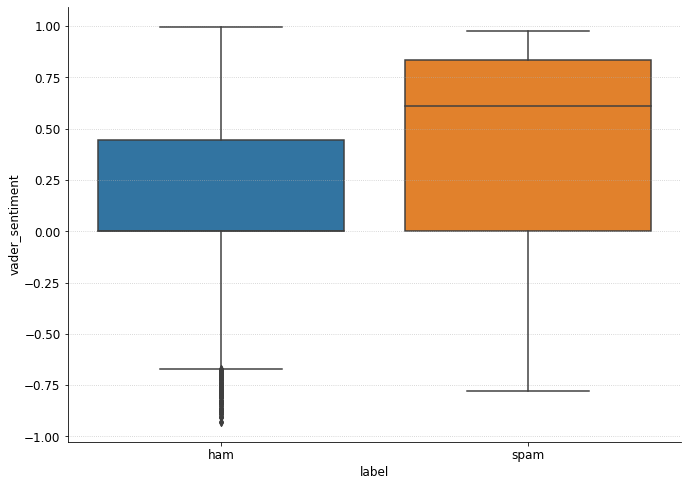

In [66]:
sns.boxplot(data=df, y="vader_sentiment", x="label")
df.groupby("label").vader_sentiment.describe()

### Afinn

In [68]:
from afinn import Afinn

sa = Afinn()

In [69]:
sa.score("Sentiment analysis is very awesome!")

4.0

In [70]:
sa.score("I am pretty worried about bad weather this weekend.")

-5.0

In [71]:
df["afinn_sentiment"] = df.text.apply(sa.score)

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
ham,4825.0,0.804767,2.983790,-13.0,0.0,0.0,2.0,50.0
spam,747.0,2.165997,3.033198,-7.0,0.0,2.0,4.0,18.0


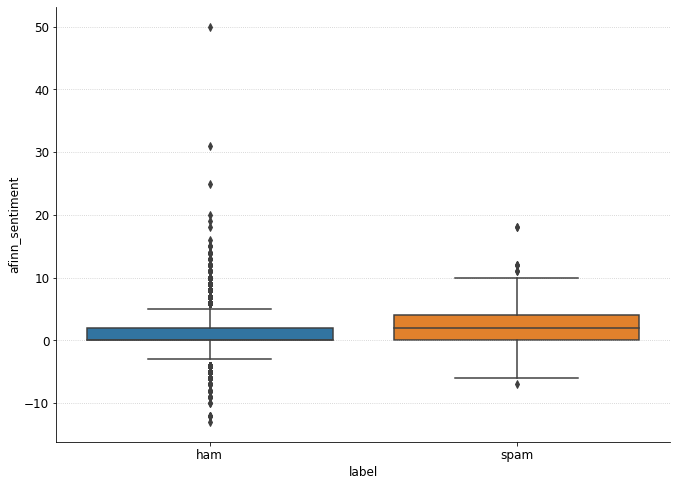

In [72]:
sns.boxplot(data=df, y="afinn_sentiment", x="label")
df.groupby("label").afinn_sentiment.describe()

## Further Reading

- [VADER Sentiment Analysis](https://github.com/cjhutto/vaderSentiment)
- [AFINN Sentiment Analysis](https://github.com/fnielsen/afinn)

## Other NLP Libraries

- [spaCy](https://spacy.io/)
- [textacy](https://chartbeat-labs.github.io/textacy/) builds on top of spaCy
- [TextBlob](https://textblob.readthedocs.io/en/dev/)

## Bonus Exercises

After you've worked through the exercises in the curriculum,

- Use sentiment analysis to explore your datasets. Which news category has the highest sentiment? Which has the lowest? Does this match with what you might predict?

- Create a feature named `has_long_words`. This should be either true or false depending on whether or not the message contains a word greater than 5 characters. Use this feature to explore spam v ham. What changes if you change the cutoff from 5 to 8 characters?

- Explore the enron spam email dataset

    Download [the json file located here](https://ds.codeup.com/enron_spam.json.gz) and read it with pandas:
    
    We have done a little preprocessing and acquisition of the [data found in this kaggle competition](https://www.kaggle.com/wanderfj/enron-spam) to make it easier to work with.
    
    ```python
    df = pd.read_json("enron_spam.json.gz")
    ```
    
    Start by focusing just on the `label`, `subject`, and `text` columns.